## EfficientDet Demonstration

This a demonstration notebook for EfficientDet: Scalable and Efficient Object Detection.    
**Inportant:** Before running this notebook, please ensure that it is placed in the root directory of the repository folder!

In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from model import EfficientDet
from utils import DetectionEvalWrapper, draw_boxes

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 12)

**First**, we create an EfficientDet model instance with a simple method 'from pretrained' that automatically loads pretrained weights

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = EfficientDet.from_pretrained('efficientdet-d2').to(device)

Loaded checkpoint weights/efficientdet-d2.pth


**Second**, create a wrapper tool on top of the model to simplify preprocessing and postrpocessing.    
As easy that, we can now feed an image path (or a list of paths) to the wrapper and get detections after postprocessing!

In [4]:
wrapper = DetectionEvalWrapper(model, device)

Let's download any image from the Internet

In [5]:
import requests

image_name = 'dummy_image.jpg'
image_url = 'https://farm9.staticflickr.com/8495/8364088239_ee448f9d94_z.jpg'

img_data = requests.get(image_url).content
with open(image_name, 'wb') as handler:
    handler.write(img_data)

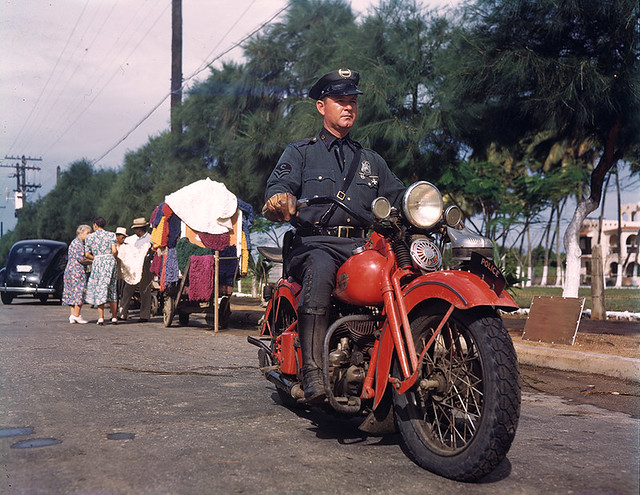

In [6]:
image = Image.open(image_name)
image

Get 'em detections!

In [7]:
detections = wrapper([image_name])

Detections is a PyTorch Tensor of shape (batch size, n_detetcions, (x1, y1, x2, y2, score, class))

In [8]:
detections.shape

torch.Size([1, 100, 6])

In [9]:
bboxes = []
scores = []
categories = []
score_threshold = 0.3

In [10]:
for detection in detections[0]:
    det = detection.data.cpu().numpy()
    bbox, score, cat = det[:4], det[4], det[5]
    # xywh -> xyxy
    bbox = [bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]]
    if score > score_threshold:
        bboxes.append(bbox)
        scores.append(score)
        categories.append(int(cat))

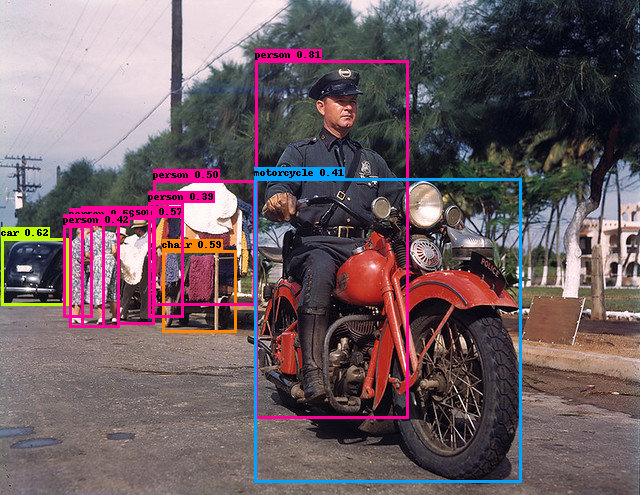

In [11]:
img = draw_boxes(np.array(image), bboxes, categories, scores)
Image.fromarray(img)